# 3 - ARIMA Model Training Notebook 

In [1]:
import sys  
sys.path.insert(1, '/Users/simon/Documents/II/Dissertation/')
%load_ext autoreload
%autoreload 2
from src.misc import load_processed_dataset, split_data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mlflow

In [ ]:
# OLD
# from statsmodels.tsa.arima.model import ARIMA

# history = [y for y in Y_train]
# preds = []

# for t in range(len(Y_test)):
#     model = ARIMA(history, order=(1,1,0))
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     preds.append(output[0])
#     history.append(Y_test[t])

# preds = pd.Series(preds, index=Y_test.index)


In [6]:
from src.models.ARIMA.data import load_data
from src.misc import split_data, evaluate, plot
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import numpy as np

X, y = load_data()

# Split
X_train, X_val, X_test = split_data(X, verbose=False)
y_train, y_val, y_test = split_data(y, verbose=False)


In [48]:
p, d, q = 1, 1, 1

In [68]:
# Model
model = ARIMA(y_train, order=(p,d,q))
fit_res = model.fit()
print(fit_res.summary())
print(fit_res.params)

                               SARIMAX Results                                
Dep. Variable:         Close Forecast   No. Observations:                 1007
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1999.639
Date:                Wed, 03 Apr 2024   AIC                           4005.279
Time:                        17:24:04   BIC                           4020.020
Sample:                             0   HQIC                          4010.880
                               - 1007                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3775      0.196     -1.926      0.054      -0.762       0.007
ma.L1          0.2884      0.203      1.421      0.155      -0.109       0.686
sigma2         3.1191      0.076     41.284      0.0

/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [72]:
print(y)

Date
2018-01-02 05:00:00     40.663891
2018-01-03 05:00:00     40.852772
2018-01-04 05:00:00     41.317890
2018-01-05 05:00:00     41.164429
2018-01-08 05:00:00     41.159706
                          ...    
2022-12-23 05:00:00    129.142456
2022-12-27 05:00:00    125.179680
2022-12-28 05:00:00    128.725296
2022-12-29 05:00:00    129.043137
2022-12-30 05:00:00    124.216309
Name: Close Forecast, Length: 1259, dtype: float64


In [73]:
from datetime import datetime
model = ARIMA(y, order=(p,d,q))
res = model.filter(fit_res.params)
# In-sample one-step-ahead predictions
predict = res.get_prediction()
# predict_ci = predict.conf_int()

preds = predict.predicted_mean
print(preds)

Date
2018-01-02 05:00:00      0.000000
2018-01-03 05:00:00     40.663879
2018-01-04 05:00:00     40.835441
2018-01-05 05:00:00     41.281329
2018-01-08 05:00:00     41.188653
                          ...    
2022-12-23 05:00:00    130.888432
2022-12-27 05:00:00    129.325071
2022-12-28 05:00:00    125.480195
2022-12-29 05:00:00    128.322620
2022-12-30 05:00:00    129.130944
Name: predicted_mean, Length: 1259, dtype: float64


/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/Users/simon/anaconda3/envs/proj/lib/python3.9/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


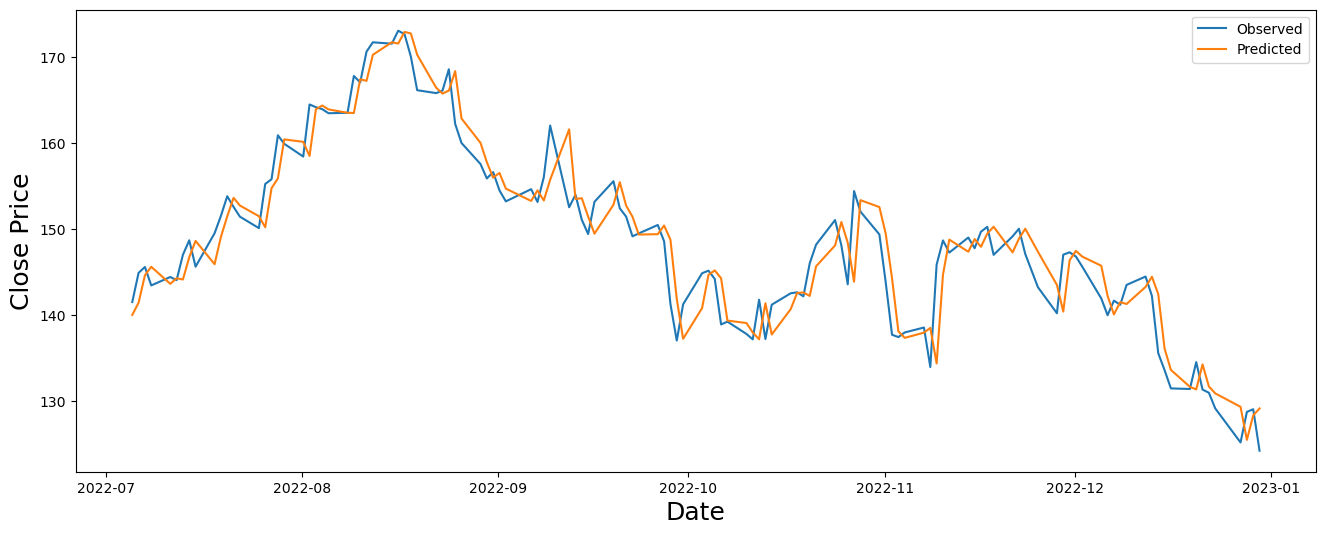

In [70]:
from src.misc import plot
plot(preds, y_test)